##                                                        logistic regresion

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit

In [4]:
heart_atttack = pd.read_csv('Heart_Attack_Dataset.csv')

In [5]:
heart_atttack.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,120,354,0,1,163,1,0.6,2,0,2,1


,sex
0,1
1,1
2,0
3,1
4,0


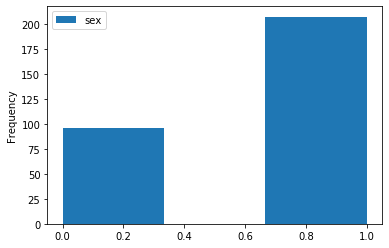

In [19]:
x = pd.DataFrame(heart_atttack,
                 columns=[
                     'age', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                     'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal',
                     'target'
                 ])
y = pd.DataFrame(heart_atttack, columns=['sex'])
display(x.head())
display(y.head())

ax = y.plot.hist(bins=3, alpha=1)

In [5]:
#split data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x,y,random_state=31,test_size=0.35)
display(len(x_train.index))
display(len(x_test.index))
display(y_train.sum())
display(y_test.sum())
y_train.shape

196

107

sex    131
dtype: int64

sex    76
dtype: int64

(196, 1)

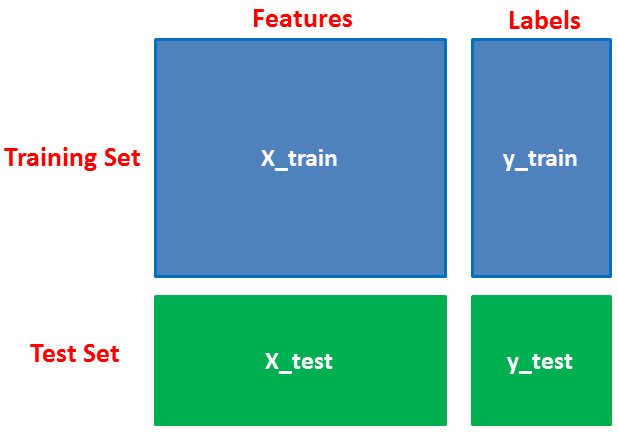

In [6]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression(max_iter=5000)
lg.fit(x_train, y_train)
y_train_pred = lg.predict_proba(x_train)[:, 1]
y_test_pred = lg.predict_proba(x_test)[:, 1]
print(y_train_pred.round())
print(y_test_pred.round())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0.
 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0.
 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1.
 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 0. 1. 1.]
[1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1.
 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0.]


In [7]:
from sklearn.metrics import recall_score, precision_score, f1_score

#validating on train
display(recall_score(y_train, y_train_pred.round()))
display(precision_score(y_train, y_train_pred.round()))
display(f1_score(y_train, y_train_pred.round()))

#validating on test
display(recall_score(y_test, y_test_pred.round()))
display(precision_score(y_test, y_test_pred.round()))
display(f1_score(y_test, y_test_pred.round()))

0.8625954198473282

0.7533333333333333

0.8042704626334518

0.8157894736842105

0.7560975609756098

0.7848101265822786

In [8]:
#confusion metrics

from sklearn.metrics import confusion_matrix

display(confusion_matrix(y_train, y_train_pred.round()))
display(confusion_matrix(y_test, y_test_pred.round()))

array([[ 28,  37],
       [ 18, 113]], dtype=int64)

array([[11, 20],
       [14, 62]], dtype=int64)

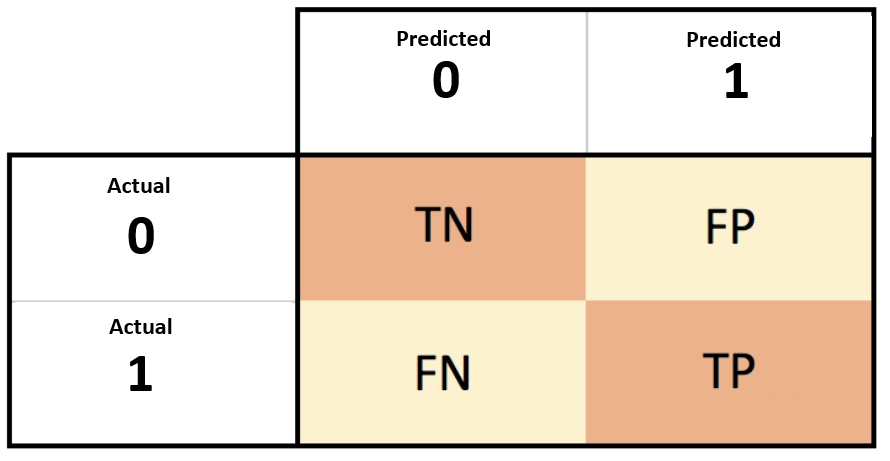